In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
from PIL import Image
from our_mpeg import load

In [5]:
example = load("/home/sidor/Dropbox/light_filed_video/bottle.zip")

In [6]:
im1 = example[0,0,0,:,:]
im2 = example[1,0,0,:,:]

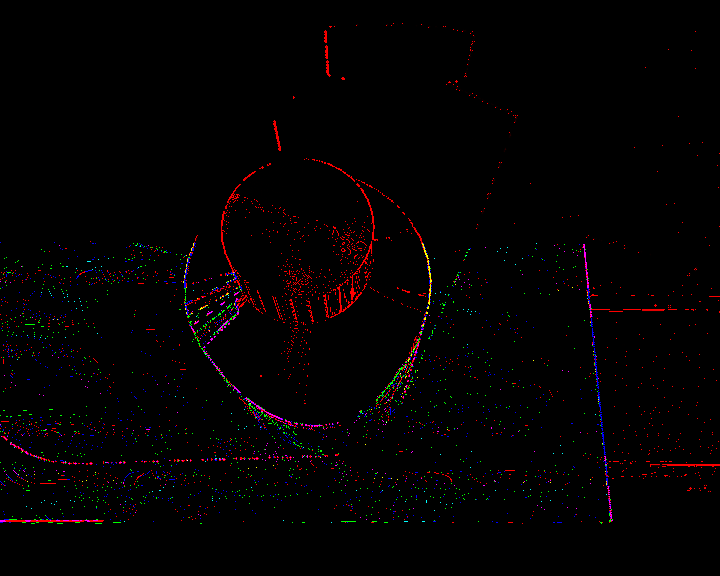

In [7]:
Image.fromarray(im1 - im2)

In [10]:
from our_mpeg import break_blocks, merge_blocks

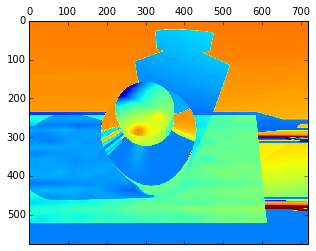

In [11]:
plt.matshow(im1[:,:,0])

0.0


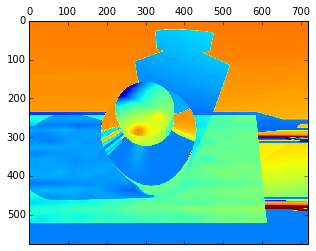

In [37]:
bb = break_blocks(im1)
im1_recovered = merge_blocks(bb)
plt.matshow(im1_recovered[:,:,0])
print(np.linalg.norm(im1_recovered - im1))

In [38]:
from our_mpeg import compute_reference, apply_reference
from our_mpeg import transform, inverse_transform
from our_mpeg import quantize, dequantize

In [39]:
im1_blocks = break_blocks(im1)
im1_offsets, im1_residuals = compute_reference(im1_blocks, im2)
im1_residuals_dct = transform(im1_residuals)
im1_residuals_q = quantize(im1_residuals_dct)

In [40]:
im1_residuals_dq = dequantize(im1_residuals_q)
print(np.linalg.norm(np.array(im1_residuals_dct) - np.array(im1_residuals_dq)))
im1_residuals_idct = inverse_transform(im1_residuals_dq)
im1_blocks_recovered = apply_reference(im1_offsets, im1_residuals_idct, im2)
im1_recovered = merge_blocks(im1_blocks_recovered)

563.466


In [41]:
from PIL import Image

709.657


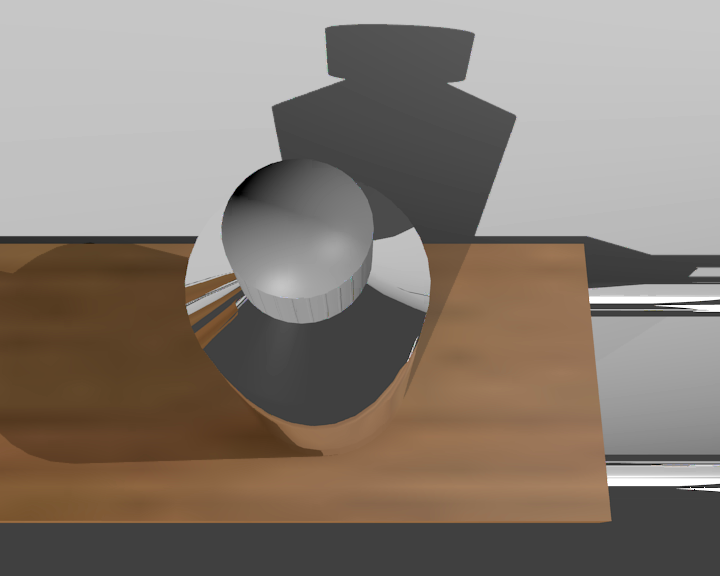

In [42]:
print(np.linalg.norm(im1_recovered.astype(np.float32) - im1.astype(np.float32)))
Image.fromarray(im1_recovered, "YCbCr").convert("RGB")

In [32]:
i.mode

'RGB'